Running Monte Carlo Simulation...


Simulating Paths: 100%|██████████| 10000/10000 [00:33<00:00, 294.17it/s]


Option Price ia) (10000 paths, N1 time steps): 0.13199274819780796


Simulating Paths: 100%|██████████| 10000/10000 [00:00<00:00, 50191.63it/s]


Option Price iia) (10000 paths, N2 time steps): 0.13254380010419337


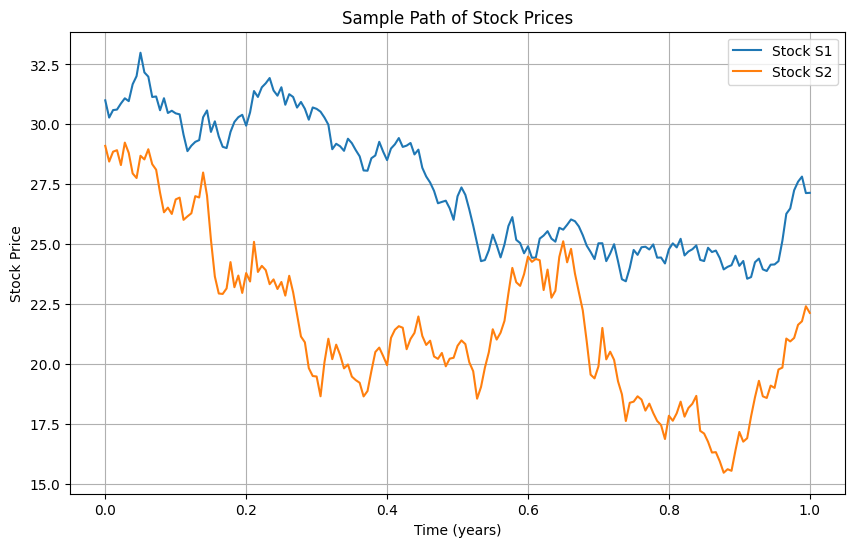

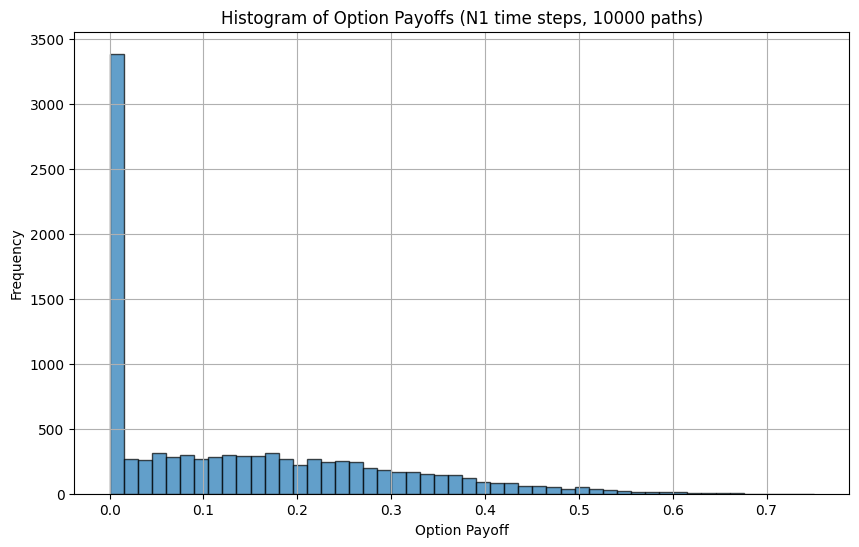

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# The required stock prices from the data
S10 = 31.00  # Starting price of S1
S20 = 29.10  # Starting price of S2
sigma1 = 0.21805  # Volatility of S1
sigma2 = 0.412894  # Volatility of S2
rho12 = 0.440247  # Correlation coefficient
r = 0.0495  # Interest rate (4.95% p.a.)
N1, N2 = 180, 2  # Number of time steps

def average_worst_of_put_option(S10, S20, sigma1, sigma2, rho12, r, N, paths, return_payoffs=False):
    """
    Monte Carlo simulation to price an average worst-of put option.
    If return_payoffs is True, the function returns both the discounted option price and
    an array of individual simulated payoffs for further visualization.
    """
    T = 1.0  # Maturity time in years
    dt = T / N  # Time step size
    payoff = np.zeros(paths)

    for i in tqdm(range(paths), desc="Simulating Paths"):
        S1 = S10
        S2 = S20
        # Simulate the evolution of both stocks over N time steps
        for j in range(N):
            Z1 = np.random.normal()  # Random normal variable for stock S1
            Z2 = rho12 * Z1 + np.sqrt(1 - rho12 ** 2) * np.random.normal()  # Correlated random variable for stock S2

            S1 = S1 * np.exp((r - 0.5 * sigma1 ** 2) * dt + sigma1 * np.sqrt(dt) * Z1)
            S2 = S2 * np.exp((r - 0.5 * sigma2 ** 2) * dt + sigma2 * np.sqrt(dt) * Z2)

            # Record stock prices at midpoint and at maturity
            if j == (N / 2 - 1):  # At midpoint (note: j starts from 0)
                S11 = S1
                S21 = S2
            if j == (N - 1):  # At maturity
                S12 = S1
                S22 = S2

        # Compute the worst performance ratios at the two times
        B1 = min(S11 / S10, S21 / S20)
        B2 = min(S12 / S10, S22 / S20)
        A = (B1 + B2) / 2
        payoff[i] = np.maximum(1 - A, 0.0)

    option_price = np.exp(-r * T) * np.mean(payoff)
    if return_payoffs:
        return option_price, payoff
    return option_price

def simulate_sample_path(S10, S20, sigma1, sigma2, rho12, r, N):
    """
    Simulates one sample path for both stocks over N time steps and returns the
    time array and the price paths for S1 and S2.
    """
    T = 1.0
    dt = T / N
    times = np.linspace(0, T, N+1)
    S1_path = np.zeros(N+1)
    S2_path = np.zeros(N+1)
    S1_path[0] = S10
    S2_path[0] = S20

    for j in range(1, N+1):
        Z1 = np.random.normal()
        Z2 = rho12 * Z1 + np.sqrt(1 - rho12 ** 2) * np.random.normal()
        S1_path[j] = S1_path[j-1] * np.exp((r - 0.5 * sigma1 ** 2) * dt + sigma1 * np.sqrt(dt) * Z1)
        S2_path[j] = S2_path[j-1] * np.exp((r - 0.5 * sigma2 ** 2) * dt + sigma2 * np.sqrt(dt) * Z2)

    return times, S1_path, S2_path

# Run the Monte Carlo simulation for option pricing and collect payoffs for visualization
print("Running Monte Carlo Simulation...")
option_price_1, payoffs_1 = average_worst_of_put_option(S10, S20, sigma1, sigma2, rho12, r, N1, 10000, return_payoffs=True)
print("Option Price ia) (10000 paths, N1 time steps):", option_price_1)

option_price_3, payoffs_3 = average_worst_of_put_option(S10, S20, sigma1, sigma2, rho12, r, N2, 10000, return_payoffs=True)
print("Option Price iia) (10000 paths, N2 time steps):", option_price_3)

# Visualize a sample path of the two stocks using N1 time steps
times, S1_path, S2_path = simulate_sample_path(S10, S20, sigma1, sigma2, rho12, r, N1)
plt.figure(figsize=(10, 6))
plt.plot(times, S1_path, label='Stock S1')
plt.plot(times, S2_path, label='Stock S2')
plt.xlabel('Time (years)')
plt.ylabel('Stock Price')
plt.title('Sample Path of Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the histogram of option payoffs from the simulation for N1 time steps
plt.figure(figsize=(10, 6))
plt.hist(payoffs_1, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Option Payoff')
plt.ylabel('Frequency')
plt.title('Histogram of Option Payoffs (N1 time steps, 10000 paths)')
plt.grid(True)
plt.show()


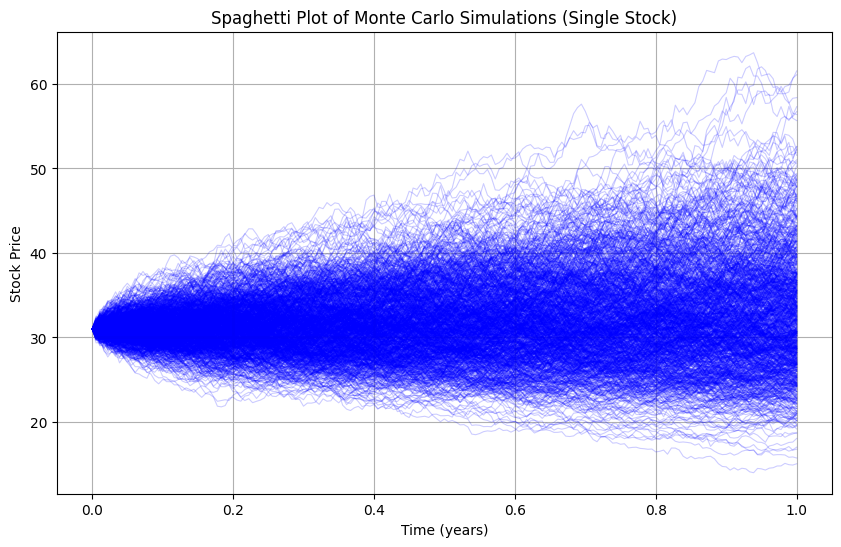

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 31.00       # Starting price
sigma = 0.21805  # Volatility
r = 0.0495       # Risk-free interest rate
T = 1.0          # Time to maturity (in years)
N = 180          # Number of time steps
paths = 1000     # Number of simulated paths

def simulate_multiple_paths(S0, sigma, r, T, N, paths, random_seed=None):
    """
    Simulate multiple paths for a single stock following Geometric Brownian Motion.

    Parameters:
    -----------
    S0 : float
        Initial stock price.
    sigma : float
        Volatility of the stock.
    r : float
        Risk-free interest rate.
    T : float
        Time to maturity (in years).
    N : int
        Number of discrete time steps.
    paths : int
        Number of Monte Carlo paths to simulate.
    random_seed : int, optional
        Random seed for reproducibility.

    Returns:
    --------
    times : numpy.ndarray
        Array of time points from 0 to T (length N+1).
    all_paths : numpy.ndarray
        2D array of shape (paths, N+1). Each row represents a simulated path.
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    dt = T / N
    times = np.linspace(0, T, N + 1)

    # Initialize an array to hold all simulated paths
    all_paths = np.zeros((paths, N + 1))
    all_paths[:, 0] = S0  # All paths start at S0

    # Simulate each path
    for i in range(paths):
        for j in range(1, N + 1):
            # Draw a random sample from a standard normal distribution
            Z = np.random.normal()
            # Update the stock price using Geometric Brownian Motion
            all_paths[i, j] = all_paths[i, j - 1] * np.exp(
                (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
            )

    return times, all_paths

# Generate paths
times, all_paths = simulate_multiple_paths(S0, sigma, r, T, N, paths)

# Create the spaghetti plot
plt.figure(figsize=(10, 6))
for i in range(paths):
    plt.plot(times, all_paths[i], color='blue', alpha=0.2, linewidth=0.8)

plt.title("Spaghetti Plot of Monte Carlo Simulations (Single Stock)")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()


The code is designed to estimate the price of an "average worst-of put option" using Monte Carlo simulation. Here’s a breakdown of its purpose and how it works:

Monte Carlo Simulation for Option Pricing:
The code simulates multiple paths (using a loop over a specified number of paths) for two correlated stocks whose price dynamics follow a geometric Brownian motion. This simulation is used to estimate the expected payoff of the option at maturity.

Simulating Stock Price Dynamics:

Stock Initialization: The starting prices (S10 and S20) and volatilities (sigma1 and sigma2) are set for the two stocks.

Correlation: The stocks are simulated with a correlation (rho12) by generating two correlated random normal variables.

Time Steps: The simulation runs over a specified number of time steps (N). At each step, the stock prices are updated using the formula for geometric Brownian motion, which includes the drift (interest rate r) and volatility terms.

Recording Prices at Specific Times:
The code records the stock prices at two specific points in time:

Midpoint: At half the simulation time (using j == (N/2 - 1)), the intermediate stock prices are stored as S11 and S21.

Maturity: At the end of the simulation (using j == (N - 1)), the final stock prices are stored as S12 and S22.

Calculating the Option Payoff:

The performance of each stock is measured by comparing the recorded prices to their starting prices (i.e., S11/S10, S21/S20 for the midpoint and similarly for maturity).

The worst performance (the minimum ratio) is taken for each time point.

The average of these two worst performance ratios is calculated.

The payoff of the option is defined as the maximum of
1
−
(average worst ratio)
1−(average worst ratio) and 0.

Discounting the Expected Payoff:
Finally, the average payoff across all simulated paths is discounted back to its present value using the interest rate r.

In summary, the code uses a Monte Carlo method to simulate the evolution of two correlated stocks over time, computes an option payoff based on the average of the worst relative performances at two different times, and then discounts that expected payoff to determine the option's price.

Integrating With the Option Pricing Code
You can integrate this spaghetti plot alongside your option-pricing logic:

Run your Monte Carlo for the option payoff (the code you already have).

In parallel, call simulate_multiple_paths (or an adapted version that includes correlation for both stocks) to generate a visual representation of the possible price evolutions.

This way, you’ll have both:

The numerical estimate of the option price (from the payoffs).

The visual intuition of how the stock(s) might behave over time (the spaghetti plot).